<p style="text-align:center"><font size="10" >Kawase Seminar 04-2
    </font></p>

# **テキストマイニング入門**
04-1ではテキストマイニングの基礎となるデータ分析の説明していきます。

04-2ではPythonでデータ分析をするためのライブラリの勉強をしていきます。

04-3 ではテキストマイニングの実践として、歌詞メーカーを実装したものを読んでいきます。

ここではpythonによる分析の基本操作をレクチャーしていきます。

- データフレーム
- データの前処理 
- 分析(今回は線形回帰分析を行う)

なお今回使用するライブラリは以下の通りです

 - os : システム関連の操作 
 - pandas : データフレーム関係の処理 
 - numpy : データフレーム関連の計算
 - sklearn : 機械学習用 
 - statsmodels : 統計量計算ライブラリ
 - matplotlib : データ描画用

# 1.データフレーム

第3回では、クローリング及びスクレイピングを用いてweb情報の取得を行いました。

そこから取得したデータを分析していくのですが、そのデータはpandas DataFrame型に格納され保存するのが一般的です。


In [2]:
# 今回使うライブラリ
# import os

# import pandas as pd
# import numpy  as np
# from numpy import nan # 欠損値
# import sklearn

## 1.0 データの準備

下記のURLからcsvデータをダウンロードする
- https://drive.google.com/file/d/1ITwo_HbU1qkm0Ths6-RXMDQYcKhii6VG/view?usp=sharing

ダウンロードしたデータをgoogle colabにアップロードする

In [3]:
import os
# まず行う操作はワーキングディレクトリの path を取得し
# csv データの置かれているディレクトリに移動すること

# os.getcwd() で今作業中のこのファイルが置かれている path が表示される
print(f"現在のワーキングディレクトリ : {os.getcwd()}")

# # 移動先のディレクトリを指定
# data_place = "ここにあなたが保存した csv のファイルがある path を書く"
# os.chdir(data_place)
# print(f"変更後のワーキングディレクトリ : \n{os.getcwd()}")

現在のワーキングディレクトリ : /home/jovyan/work/スクレイピングとテキストマイニング教材


1. なにを課題とし解決したいのかを考える
2. その課題にたいして方法でデータを集分析をがしていくことが適切か考える
3. データを収集する
4. **データを処理する -> イマココ**
5. データを分析する
6. 分析結果から課題解決のための提案や説明をおこなう

## 1.1pandasとは
外部ライブラリでcsv/excel/バイナリデータの読み込み/書き込みを行うライブラリ。

データの加工なども行うのでデータクレンジングなどデータを加工する前処理と解析後のデータ保存などで大活躍する。

データを扱う際は必須となるであろうライブラリ。

## 1.2 pandasのデータフレームとは
データフレームは、数値ベクトルや文字ベクトル、因子ベクトル(文字型ベクトル)などの異なる型のデータをまとめて1 つの変数として持っている型。

外見は行列と同じ 2 次元配列であるが、データフレームの各行・列はラベルを必ず持ち,ラベルによる操作が可能である点が普通の行列と異なる。

しかも各列の要素の型はバラバラでも構わないので、ベクトルやリストで持っているデータをデータフレームに変換することで統計解析がやりやすくなる。

In [10]:
# pandas をインポートする
import pandas as pd

#read_csvメソッドでswissデータを読み込む
df =  pd.read_csv(os.getcwd() + "/LEC07/csv_data/swiss.csv", index_col=0)
#DataFrame型を複数持つリストを返す
df

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


## 1.3 pandas.Series型
Series型は一次元のデータフレームです。　DataFrame型の1列(カラム)のデータに相当します。
[![Image from Gyazo](https://i.gyazo.com/4928a1fae957841d740b77f51a40e79a.png)](https://gyazo.com/4928a1fae957841d740b77f51a40e79a)

In [73]:
# Series オブジェクトは一次元の配列を扱うときに使用する。
# 右側はデータフレームのインデックス( index )で、左が要素( values )となっている。
df1 = pd.Series([0,10,20,30,40,50,60,70,80,90])
print(df1 , type(df1))

In [72]:
# index は 名づけることが可能で、index と values はそれぞれ別々に取り出し可能
df2 = pd.Series([0,10,20,30,40,50,60,70,80,90],index = ["a","b","c","d","e","f","g","h","i","j"])
print(df2)
print("-----------")
print(f"data_frame_02.values : {df2.values}")
print(f"data_frame_02.index : {df2.index}")

## 1.4 pandas.DataFrame型
DataFrame型は2次元のデータフレームです。　
[![Image from Gyazo](https://i.gyazo.com/5521a94a7c3eda774cfdc5afca2c53bb.png)](https://gyazo.com/5521a94a7c3eda774cfdc5afca2c53bb)

In [71]:
# Series オブジェクトが一次元配列であることは理解
# 次は二次元配列を扱う DataFrame オブジェクトを見ていく。
data_3 = {"a":[1,2,3],
           "b":[4,5,6],
           "c":[7,8,9]}
df3 = pd.DataFrame(data_3)
# jupyter では DataFrame 型などは print 関数を用いないほうが見やすくなる。
df3

# ここで、"a" "b" "c" は列名であり、あくまでも インデックスは 0, 1, 2 となっている。
# こちらもインデックスの名前は変更可能

### 転置 (T)

In [70]:
# データフレームを行列のように転置させることが可能
# T メソッドで転置可能
df3.T

### DataFrame型の参照

In [69]:
# ID : 固有識別番号
# sex : 性別 M = 男性, F = 女性, N = 指定しない
# age : 年齢
# residence : 住居
# savings : 貯金　単位は[万]

data_04 = {"ID":[1,2,3,4,5,6,7,8,9,10],
           "sex":["M","F","N","M","F","M","N","M","N","M"],
           "age":[19,16,24,25,17,15,20,25,26,18],
           "residence":["関東","関西","関東","関西","関東","関東","関東","関西","関東","関東"],
           "savings":[50,45,100,150,70,60,200,190,300,100]}
df4 = pandas.DataFrame(data_04)
df4

In [64]:
# df4のデータフレームの age列のみを取り出したい
print(df4.age)

print("-"*100)

# こちらでも可能
print(df4["age"])

In [65]:
#  df4の のデータフレームの sex,age 列を取り出したい(複数取り出したい)
df4[["sex","age"]]

In [66]:
# df4 のデータで女性のみのデータを取り出したい時
# データフレームの辞書型的な参照をしている。
df4_female = df4[df4["sex"] == "F"]
df4_female

In [67]:
# 複数の情報を指定するときは isin を使用
# ここで、性別が男性もしくは女性のみのデータを取り出している
df4_MorF = df4[df4["sex"].isin(["M","F"])]
df4_MorF

### 削除(drop)

In [68]:
# 行、列の削除
# drop メソッドを使用してデータを削除する
# axis = 1 で列を削除、 axis = 0 で行を削除
df4_del_sex = df4.drop(["sex"],axis = 1)
df4_del_sex

### 結合(merge)

In [75]:
# 次は data_frame_05 を見ていく
# ID : 固有識別番号
# paramour : 恋人の有無 True で現在いる False でいない
# friends : 友人の数
# sleeptime : 睡眠時間 単位は[h]
# savings : 貯金　単位は[万]

# また、ここから欠損値と呼ばれる nan が存在している。
# 欠損値に関してはどのように取り扱うかが今も議論されているが、その時々によって臨機応変に書き換えていく必要がある
data_05 = {"ID":[1,2,3,4,5,6,7,8,9,10],
           "paramour":[True,True,True,False,nan,True,True,True,False,True],
           "friends":[10,5,nan,21,16,8,4,0,23,11],
           "sleeptime":[6,8,7,7,8,6,nan,7,6,8]}
df5 = pandas.DataFrame(data_05)
df5

In [74]:
df4_5 = pandas.merge(df4, df5)
df4_5

この場合、データに欠損値が含まれている。

このあとのデータの前処理こうした欠損値の扱いを学んでいく。


# Exercise 04-1 問題

### (1)データフレームの参照の確認①

```python
df4 を用いて 年齢が 20 才以下の人のみを抽出した df4_u20 を作成せよ
```

In [63]:
data_04 = {"ID":[1,2,3,4,5,6,7,8,9,10],
           "sex":["M","F","N","M","F","M","N","M","N","M"],
           "age":[19,16,24,25,17,15,20,25,26,18],
           "residence":["関東","関西","関東","関西","関東","関東","関東","関西","関東","関東"],
           "savings":[50,45,100,150,70,60,200,190,300,100]}
df4 = pd.DataFrame(data_04)

#　ここに記述せよ

### (２)データフレームの参照の確認②

```python
上記のdf4 を用いて 年齢が 20 才以下でかつ関東に住居をもつ人のみを抽出した df4_u20_and_Kanto を作成せよ
```

In [ ]:
#　ここに記述せよ

### (3)データフレームの項目削除

```python
上記のdf4 を用いて 貯金データを削除した df4_del_savings を作成せよ
```

In [ ]:
# ここに作成せよ

---

# 2. データの前処理

データは基本的に揃っていないものが多く、揃っている方が少ないです。

そうなると必要になる欠損値の処理ですが、

欠損値は無視がいいのか、除外するのか、平均値にするか、中央値にするか、正規分布に合わせるか...等  

様々な方法があり、データに合わせて使い分けないと、バイアスを生み、大きな損失となる場合があります。

ここからは欠損値データの取り扱いを学んでいきます。


In [31]:
import numpy  as np

df1 = pandas.DataFrame(numpy.random.rand(10,4))
df1

,0,1,2,3
0,0.085864,0.854266,0.020503,0.826464
1,0.790427,0.406228,0.850256,0.657738
2,0.708149,0.304850,0.291156,0.483583
3,0.318629,0.720604,0.702014,0.861760
4,0.063239,0.289058,0.965819,0.078973
5,0.541035,0.520049,0.075566,0.951007
6,0.456507,0.953680,0.811837,0.656867
7,0.852518,0.531585,0.081212,0.537927
8,0.301031,0.349341,0.745076,0.332015
9,0.127701,0.816180,0.368107,0.980691


In [33]:
# 欠損値を生成
# .ilocで行列のインデックス指定して特定の値にアクセスすることができる

# 1 行 0 列目を欠損値に
df1.iloc[1,0] = nan
# 2 行 2 列目を欠損値に
df1.iloc[2:3,2] = nan
# 5 行以降 3 列目を欠損値に
df1.iloc[5:,3] = nan
df1

,0,1,2,3
0,0.085864,0.854266,0.020503,0.826464
1,NaN,0.406228,0.850256,0.657738
2,0.708149,0.304850,NaN,0.483583
3,0.318629,0.720604,0.702014,0.861760
4,0.063239,0.289058,0.965819,0.078973
5,0.541035,0.520049,0.075566,NaN
6,0.456507,0.953680,0.811837,NaN
7,0.852518,0.531585,0.081212,NaN
8,0.301031,0.349341,0.745076,NaN
9,0.127701,0.816180,0.368107,NaN


### リストワイズ処理（欠損値のあるデータ行を全て消す方法）

In [35]:
# まずはリストワイズ削除
df1.dropna()

,0,1,2,3
0,0.085864,0.854266,0.020503,0.826464
3,0.318629,0.720604,0.702014,0.861760
4,0.063239,0.289058,0.965819,0.078973


### ペアワイズ処理(欠損値のあるデータ列を全て消す方法）

In [36]:
# 続いてペアワイズ削除
# やっていることは NaN の削除なので、コード的には同じことをしている
df1[[0,1,2]].dropna()

,0,1,2
0,0.085864,0.854266,0.020503
3,0.318629,0.720604,0.702014
4,0.063239,0.289058,0.965819
5,0.541035,0.520049,0.075566
6,0.456507,0.953680,0.811837
7,0.852518,0.531585,0.081212
8,0.301031,0.349341,0.745076
9,0.127701,0.816180,0.368107


### fillnaメソッド

In [38]:
# fillna メソッドで NaN の場所を好きな数字で埋めることが可能
# ゼロ埋め
df1.fillna(0)

,0,1,2,3
0,0.085864,0.854266,0.020503,0.826464
1,0.000000,0.406228,0.850256,0.657738
2,0.708149,0.304850,0.000000,0.483583
3,0.318629,0.720604,0.702014,0.861760
4,0.063239,0.289058,0.965819,0.078973
5,0.541035,0.520049,0.075566,0.000000
6,0.456507,0.953680,0.811837,0.000000
7,0.852518,0.531585,0.081212,0.000000
8,0.301031,0.349341,0.745076,0.000000
9,0.127701,0.816180,0.368107,0.000000


In [41]:
# 列の平均で埋める方法
df1.fillna(df1.mean())

,0,1,2,3
0,0.085864,0.854266,0.020503,0.826464
1,0.383852,0.406228,0.850256,0.657738
2,0.708149,0.304850,0.513377,0.483583
3,0.318629,0.720604,0.702014,0.861760
4,0.063239,0.289058,0.965819,0.078973
5,0.541035,0.520049,0.075566,0.581704
6,0.456507,0.953680,0.811837,0.581704
7,0.852518,0.531585,0.081212,0.581704
8,0.301031,0.349341,0.745076,0.581704
9,0.127701,0.816180,0.368107,0.581704


In [42]:
# 前の値で埋める
df1.fillna(method = "ffill")

,0,1,2,3
0,0.085864,0.854266,0.020503,0.826464
1,0.085864,0.406228,0.850256,0.657738
2,0.708149,0.304850,0.850256,0.483583
3,0.318629,0.720604,0.702014,0.861760
4,0.063239,0.289058,0.965819,0.078973
5,0.541035,0.520049,0.075566,0.078973
6,0.456507,0.953680,0.811837,0.078973
7,0.852518,0.531585,0.081212,0.078973
8,0.301031,0.349341,0.745076,0.078973
9,0.127701,0.816180,0.368107,0.078973



# Exercise 04-2 問題

### (1)欠損値処理

```python
乱数を用いて 100 × 8 のデータフレーム df2 を作成し,乱数を用いて 150個 の欠損値を埋め込んだ df2_nan がある。

このdf_02_nan の欠損値を 0 .平均.中央値 で埋めたもの合計値をそれぞれ出力せよ。
```

In [77]:
import random as rd

df2 = pd.DataFrame(np.random.rand(100,8))


# 1)isnullで欠損値がどうかをSeries配列でそれぞれにbool型で返す。
# 2) boolでTrueの合計値をSeries配列の項目ごとで返す
# ３）　2で出たsumの合計値を返す
while df2.isnull().sum().sum() < 150 :
    
    df2.iloc[rd.randint(0,99), rd.randint(0,7)] = nan

#------------------------------------------------------------------
#ここに記述せよ

#0


#-----------
#平均値

#-----------
#中央値


---

データの前処理は、データのジャンルや、数によってやり方が変わるが  
欠損値の処理は基本的にどのデータでも行うので、必須の知識となります。  


他には、定性情報をデータの型の変換(男を 1 、女を 0 と str → int に変換)してダミー変数としたり、
次元を減らすために主成分分析を行ったりします。

もしデータ分析に興味のある方は numpy pandas sklearn 辺りを独自で調べてみるのもよいです！

---


# 3.データ分析
    
データの前処理まで終われば次は分析をしていきます。    
ここでは基礎的な線形回帰分析について学びます。

1. なにを課題とし解決したいのかを考える
2. その課題にたいして方法でデータを集分析をがしていくことが適切か考える
3. データを収集する
4. データを処理する 
5. **データを分析する -> イマココ**
6. 分析結果から課題解決のための提案や説明をおこなう

In [57]:
import pandas as pd
import numpy  as np
import sklearn # 機械学習ライブラリ
from sklearn import linear_model # 線形モデル関係
import statsmodels.api as smf # 統計量計算
import matplotlib.pyplot as plt # 描画ライブラリ
import seaborn as sns # 描画ライブラリ

今回読み込むデータは以下のようなデータです。今回の分析の課題は、「様々な項目から出生率を予測する」というもので考えています。

In [53]:
# まずはデータの読み込みから
# 行情報 : スイスの 47 自治体の名前
# 列情報
# Fertility : 出生率
# Agriculture : 男性労働者のうち農業従事者の割合
# Examination : 軍の試験で最高レベルで合格したその地域の出身者の数
# Education : 被徴兵者の小学校以上の学歴
# Catholic : カトリック教徒の割合
# Infant.Mortality : 1 歳未満の幼児死亡率

swiss = pd.read_csv('./LEC07/csv_data/swiss.csv',index_col = 0)
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


今回は「出生率を予測する」ことが求められています。

そのため、予測（分析）できるように、下記のようにまずデータを加工していきます。

その後、分析をします。

今回は線形回帰分析を行います。尚、式は以下の通りです。

[![Image from Gyazo](https://i.gyazo.com/51b4560e3c3729689020a93e135aa0b3.png)](https://gyazo.com/51b4560e3c3729689020a93e135aa0b3)


In [62]:
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
swiss_new = swiss.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
swiss_new
# 説明変数に "Fertlity (出生率スコア以外すべて)" を利用
swiss_new_except_Fertility = swiss_new.drop("Fertility", axis=1)
X = swiss_new_except_Fertility.values  #valuesを出すとエラーが出る
 
# 目的変数に "Fertility (出生率)" を利用
Y = swiss_new['Fertility'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":swiss_new_except_Fertility.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
    
print("-"*100)
# 切片 (誤差)
print(clf.intercept_)

               Name  Coefficients
1       Examination      0.152561
3          Catholic      0.177177
0       Agriculture      0.264906
4  Infant.Mortality      0.295954
2         Education      0.787633
----------------------------------------------------------------------------------------------------
-2.6496280482901544e-16


予測値がでました、詳しい内容は省きますが、とりあえず重回帰分析では「予測値が出る」ということを抑えましょう。

---

### 統計量の確認

予測値が出ることが分かった後、その予測値が正しいのか確認します。

確認の際は統計量をつかいます。

In [58]:
# X　Y　は上と同じデータを使用している
model = smf.OLS(Y,X) 
# 上記では係数、切片のみを計算しているのに対して、こちらは様々な統計量も計算している
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              20.24
Date:                Wed, 31 Mar 2021   Prob (F-statistic):                    3.13e-10
Time:                        10:48:16   Log-Likelihood:                          34.398
No. Observations:                  47   AIC:                                     -58.80
Df Residuals:                      42   BIC:                                     -49.55
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2649      0.107     -2.478      0.017      -0.481      -0.049
x2            -0.1526      0.148     -1.029      0.310      -0.452       0.147
x3            -0.7876      0.164     -4.816      0.000      -1.118      -0.458
x4             0.1772      0.059      2.989      0.005       0.058       0.297
x5             0.2960      0.104      2.856      0.007       0.087       0.505
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         5.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

様々な項目がありますが、基本的に「決定係数」と「P値」をみます。

> 決定係数：説明変数が目的変数に対してどれくらい当てはまりがいいか表す値のこと。(１に近ければ近いほど当てはまりが良い)

> p値: 説明変数以外のものにより目的変数に影響を与えている確率（p値が０．０５以下なら説明変数以外のもので影響を与えていると判断してよい)

決定係数をみると、0.7と表示されています。

これは、出生率のデータがどういった要因で説明されているかが７０パーセント分かった、という意味で、かなりデータ分析のモデルが当てはまりが良いです。

また、P値(P >|t|)をみると、0.05以上の数値をもつ要因(説明変数)が１つみられます。

P値に関しては、0.05以上の場合ｍ別の要因によって出生率に影響を与えている可能性があるため、適切でないP値をもつデータを除いて再度統計量を出す必要があります。

### 当てはまりがよい予測モデルを作成するためにデータ処理をおこない再度統計量を表示する

さきほどの統計量から、P値に問題がある指標がみつかりました。これをもとに、データ処理をおこない再度統計量を出していきます！

P値をみるに、  ” ×2 “の指標が問題の指標となっています。

なので、”×2″の指標である”Examination”という指標を削除し、再度統計量を求めます。


# Exercise 04-3 問題

### (1)データ分析

```python
 swiss データからp値に問題がある説明変数を省いてもう一度統計量を計測せよ。
```


In [ ]:
#ここに記述せよ

これをみると、P値の問題が解消されていることがわかり、データが正しく分析できていることが分かります！

重回帰分析が慣れていない人は難しかったかもしれませんが、ここでは「分析結果が正しいかどうか判断する」ということを抑えましょう！

---

### 多重共線性によるデータ処理が必要か確認する

さきほどP値によるデータ処理をおこないましたが、重回帰分析特有でもう一つ重要な処理をおこなう必要があります。

ズバリ、多重共線性です。


>多重共線性:  説明変数間で相関係数が高いときに、それが原因で発生する現象

多重共線性が起こると分析結果にバグが生じてしまい、正確な分析ができなくなってしまいます。

従って、多重共線性が起きているか確認する必要があります。

下記のようなコードをかき、説明変数間で相関係数が高いかどうか調べます。

<AxesSubplot:title={'center':"swiss's correlation matrix"}>

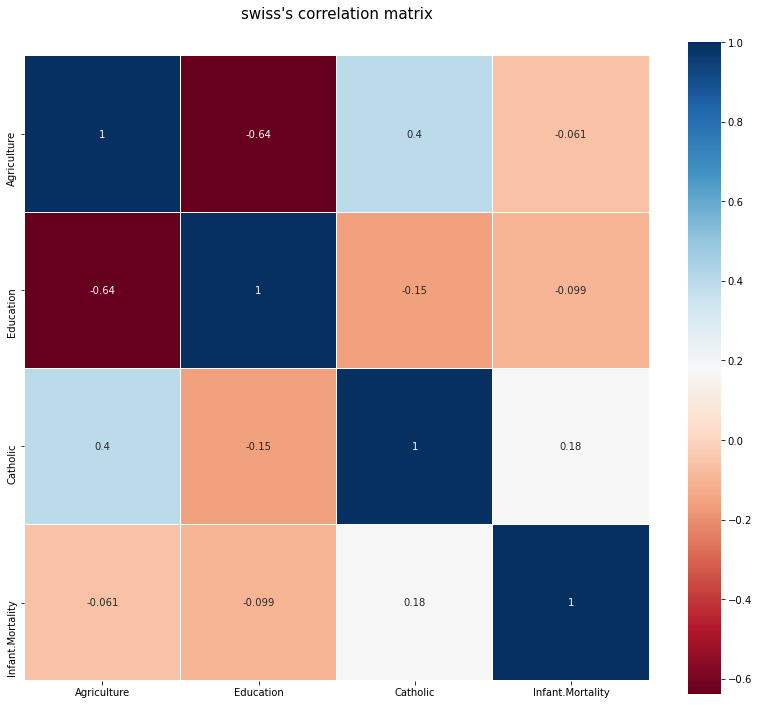

In [61]:
# カラーマップの設定
colormap = plt.cm.RdBu
# フォントの設定
plt.rcParams['font.family'] = 'Yu Mincho'
# 描画サイズの設定
plt.figure(figsize=(14,12))
# タイトル
plt.title("swiss's correlation matrix", y=1.05, size=15)
# ヒートマップの描画
sns.heatmap(swiss_new_Fertility.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

結果をみるに、説明変数間の相関係数がひくいことから多重共線性は起きていないことがわかります。


なので、P値によりデータ処理をおこなった分析は、正しく結果が出ていることがわかります！

もし、多重共線性に問題がありデータ処理をおこなったさいに、P値に問題が発生した場合はP値によるデータ処理を行って統計量を確認しましょう！

 

今回の流れが、課題に対して、データを加工し分析する、という流れです。

その後、予測をもとに課題に沿った提案や解決をおこないます!!!!

---